In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Análise Exploratória 

In [273]:
train_df = pd.read_csv("../train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [274]:
train_df.shape

(891, 12)

<b>O dataset contêm 891 amostras, e 12 Features</b>

In [275]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<b>Como observado nas infos do dataset, existem amostras com dados faltantes, nas features de Embarque, idade e Cabine<b>

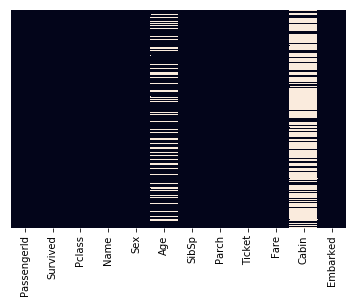

In [276]:
sns.heatmap(train_df.isnull(),cbar=False,yticklabels=False)

<b>Distribuição dos dados Faltantes por features</b>

<b>A seguir serão exploradas as features do dataset</b>

## 1. Sexo

In [277]:
def plot_chart_pie(df, column, labels,title):
    dict_aux = dict(df[column].value_counts())
    sizes = [dict_aux[0], dict_aux[1]]
    _ , ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.title.set_text(title)
    ax1.axis('equal')
    plt.show()

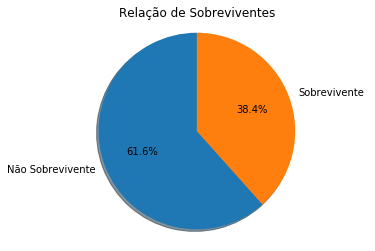

In [278]:
labels = 'Não Sobrevivente', 'Sobrevivente'
plot_chart_pie(train_df, 'Survived',labels, 'Relação de Sobreviventes')

<b>Acima é mostrado como estão distribuido os sobreviventes e os não sobreviventes </b>

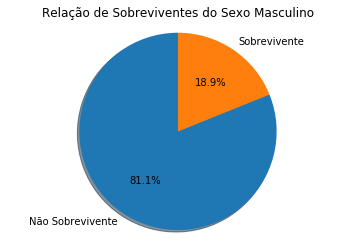

In [279]:
labels = 'Não Sobrevivente', 'Sobrevivente'
df_male = train_df.loc[train_df['Sex']=='male']
plot_chart_pie(df_male, 'Survived', labels,'Relação de Sobreviventes do Sexo Masculino')

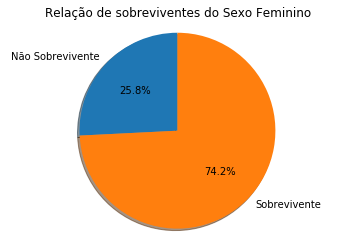

In [280]:
labels = 'Não Sobrevivente', 'Sobrevivente'
df_male = train_df.loc[train_df['Sex']=='female']
plot_chart_pie(df_male, 'Survived', labels, 'Relação de sobreviventes do Sexo Feminino')

<b> Os gráficos acima mostram que as mulheres tiveram maior taxa de sobrevivência em relação aos homens, onde quase 3/4 da população total feminia sobreviveu, já os homens tiveram taxa de baixas de mais de 80%, evidenciando uma tendência em dar prioridade para o salvamento de mulheres.</b>

## 2. Idade

In [281]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

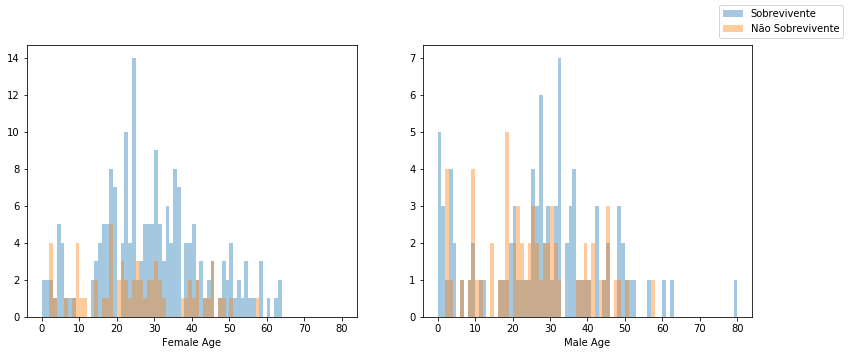

In [282]:
male_survived = train_df[(train_df['Survived']==1) & (train_df['Sex']=="male")]
female_survived = train_df[(train_df['Survived']==1) & (train_df['Sex']=="female")]
male_non_survived = train_df[(train_df['Survived']==0) & (train_df['Sex']=="male")]
female_non_survived = train_df[(train_df['Survived']==0) & (train_df['Sex']=="female")]

fig = plt.figure(figsize=[13,5])
plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False)
sns.distplot(female_non_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False,
            axlabel='Female Age')
plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False)
sns.distplot(female_non_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False,
            axlabel='Male Age')

fig.legend(labels=['Sobrevivente','Não Sobrevivente'])

<b>Para as mulheres a idade não apresenta um relação com o fato de sobreviver, devido estar muito bem distribuído ,já para os homens existe um leve tendência em sobreviver os homens mais novos até mais ou menos 12 anos, homens mais velhos tiveram mais mortes</b>

<b>Dentro do nome, existe uma relação de titulo, onde pode-se saber o nível de importância da pessoa ou seu status civil</b>

In [283]:
def get_titles(df):
    titles = []
    for name in df['Name']:
        name_string = str(name)
        splited_comma = name_string.split(', ')
        splited_dot = splited_comma[1].split('. ')
        titles.append(splited_dot[0])
    return titles
train_df['Titles'] = get_titles(train_df)

In [284]:
def get_titles_null(df):
    titles = []
    null = df[df['Age'].isnull()]
    for name in null['Name']:
        name_string = str(name)
        splited_comma = name_string.split(', ')
        splited_dot = splited_comma[1].split('. ')
        titles.append(splited_dot[0])
    return titles

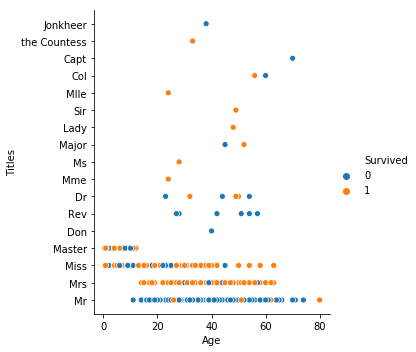

In [285]:
sns.relplot(x="Age", 
            y="Titles", 
            hue="Survived",
            data=train_df
           );

<p><b>Aqui é possivel observar como é distribuída a relação dos titulos, com a idade e se a pessoa é sobrevivente. Aqui novamente é observado que homens maiores do que 13 anos morreram mais, devido o titulo de "Mr" nos pronomes de tratamento ingleses descrever homens casados, "Master" que é dado a homens jovens solteiros, pode-se observar que eles já existe um tendência de sobreviver, e mulheres no geral que respondem pelos titulos de "Mrs" e "Miss" no geral sobreviveram. </b><p>
<p><b>Os demais titulos não apresentam ter relação com a sobrevivência, apenas aqueles que indicam ser pertencentes a mulheres como Lady e The Countess, interessante notar que todos os Reverendos morreram no acidente.</b></p>

<p>fonte para os pronomes de tratamento ingleses(https://en.wikipedia.org/wiki/English_honorifics)</p>

In [286]:
def bar_chart(df, title):
    chart_of_categories = sns.countplot(x="Pclass",data=df, palette="Set1")
    chart_of_categories.set_xticklabels(chart_of_categories.get_xticklabels(),rotation=90,ha="right")
    chart_of_categories
    plt.title(title, size=20)

# Pclass

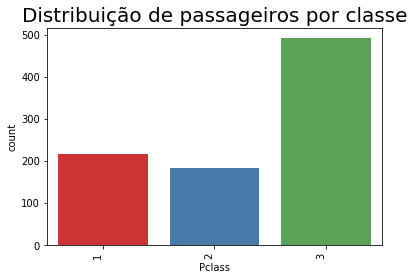

In [287]:
bar_chart(train_df, "Distribuição de passageiros por classe")

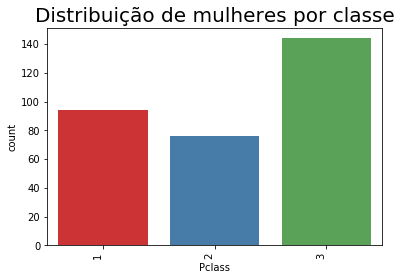

In [288]:
female_df = train_df[train_df['Sex']=='female']
bar_chart(female_df, 'Distribuição de mulheres por classe')

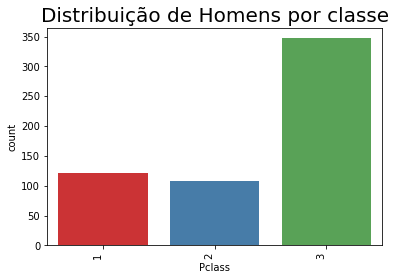

In [289]:
male_df = train_df[train_df['Sex']=='male']
bar_chart(male_df, "Distribuição de Homens por classe")

<b>Em todas as classes tem mais homens que mulheres, a terceira classe no geral foi onde a maioria dos tribulantes viageram no Titanic</b>

In [290]:
male_df = train_df[(train_df['Sex']=='male') & (train_df['Survived']==1)]
female_df = train_df[(train_df['Sex']=='female') & (train_df['Survived']==1)]

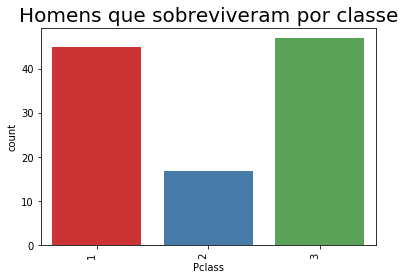

In [291]:
bar_chart(male_df, "Homens que sobreviveram por classe")

<p><b>Por mais que existam mais homens na terceira classe que na primeira, tiveram um numero de sobreviventes muito proximo
Com isso é possível observar uma prioridade para salvar essas pessoas, ou elas tiveram alguma vantagem em relação aos demais.
</b></p>

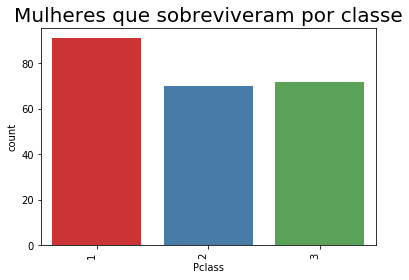

In [292]:
bar_chart(female_df, "Mulheres que sobreviveram por classe")

<b>Muitas mulheres da primeira classe sobreviveram.</b>

In [293]:
def survived_class_sex_proportion(train_df, sex, pclass):
    class_amount = train_df[(train_df['Pclass']==pclass)&(train_df['Sex']==sex)]
    total_amount = class_amount['Pclass'].value_counts()
    class_survived_amount = train_df[(train_df['Pclass']==pclass) & (train_df['Survived']==1) & (train_df['Sex']==sex)]
    survived_amount = class_survived_amount['Pclass'].value_counts() 
    resut = float(survived_amount)/float(total_amount)*100
    print("Proporção de sobreviventes na classe "+str(pclass)+" " +'{:.2f} '.format(resut))

In [294]:
print("Taxa de Homens sobreviventes de acordo com a classe\n")
survived_class_sex_proportion(train_df, 'male', 1)
survived_class_sex_proportion(train_df, 'male', 2)
survived_class_sex_proportion(train_df, 'male', 3)

print("\nTaxa de Mulheres sobreviventes de acordo com a classe\n")

survived_class_sex_proportion(train_df, 'female', 1)
survived_class_sex_proportion(train_df, 'female', 2)
survived_class_sex_proportion(train_df, 'female', 3)

Taxa de Homens sobreviventes de acordo com a classe

Proporção de sobreviventes na classe 1 36.89 
Proporção de sobreviventes na classe 2 15.74 
Proporção de sobreviventes na classe 3 13.54 

Taxa de Mulheres sobreviventes de acordo com a classe

Proporção de sobreviventes na classe 1 96.81 
Proporção de sobreviventes na classe 2 92.11 
Proporção de sobreviventes na classe 3 50.00 


<p><b>Acima é observado a taxa de sobreviventes por classe, onde as mulheres da primeira e segunda classes tiveram uma grande taxa de sobrevivencia em relação as mulheres da 3 classe, entre os homens a melhor taxa de sobrevivencia foi na primeira classe. </b><p>

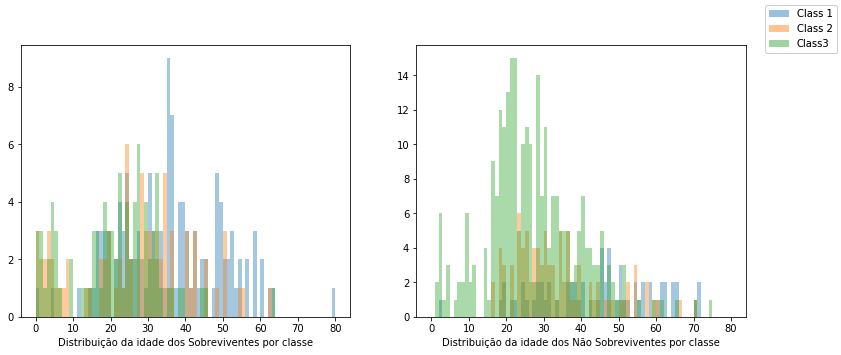

In [295]:
pclass_1_survived = train_df[(train_df['Survived']==1) & (train_df['Pclass']==1)]
pclass_2_survived = train_df[(train_df['Survived']==1) & (train_df['Pclass']==2)]
pclass_3_survived = train_df[(train_df['Survived']==1) & (train_df['Pclass']==3)]
pclass_1_nosurvived = train_df[(train_df['Survived']==0) & (train_df['Pclass']==1)]
pclass_2_nosurvived = train_df[(train_df['Survived']==0) & (train_df['Pclass']==2)]
pclass_3_nosurvived = train_df[(train_df['Survived']==0) & (train_df['Pclass']==3)]

fig = plt.figure(figsize=[13,5])
plt.subplot(121)
sns.distplot(pclass_1_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False)
sns.distplot(pclass_2_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False)
sns.distplot(pclass_3_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False,
            axlabel='Distribuição da idade dos Sobreviventes por classe')
fig.legend(labels=['Class 1','Class 2', 'Class3'])

plt.subplot(122)
sns.distplot(pclass_1_nosurvived['Age'].dropna().values, bins=range(0, 81, 1), kde=False)
sns.distplot(pclass_2_nosurvived['Age'].dropna().values, bins=range(0, 81, 1), kde=False)
sns.distplot(pclass_3_nosurvived['Age'].dropna().values, bins=range(0, 81, 1), kde=False,
            axlabel='Distribuição da idade dos Não Sobreviventes por classe')

fig.legend(labels=['Class 1','Class 2', 'Class3'])

<b>A maioria do sobreviventes menores de 10 anos não pertencem a primeira.</b>

# Embarque

{'S': 644, 'C': 168, 'Q': 77}


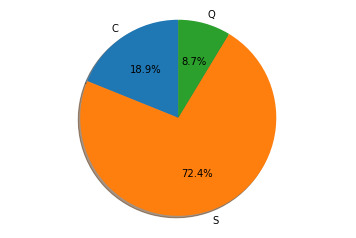

In [296]:
labels = 'C', 'S', 'Q'
dict_aux = dict(train_df['Embarked'].value_counts())
print(dict_aux)
sizes = [dict_aux['C'], dict_aux['S'], dict_aux['Q']]
_ , ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

<p><b>Maioria das pessoas embarcaram em Southamptom</b></p>

# Tickets e Fare

In [297]:
train_df['Ticket'].nunique()

681

<b>Existe uma grande quantidade de tickets diferentes</b>

In [298]:
train_df['Ticket'].value_counts()

1601                 7
347082               7
CA. 2343             7
CA 2144              6
347088               6
3101295              6
382652               5
S.O.C. 14879         5
349909               4
113760               4
4133                 4
347077               4
W./C. 6608           4
LINE                 4
17421                4
113781               4
PC 17757             4
2666                 4
19950                4
230080               3
110413               3
PC 17582             3
345773               3
347742               3
PC 17760             3
110152               3
PC 17572             3
363291               3
371110               3
35273                3
                    ..
237565               1
9234                 1
349247               1
14311                1
364848               1
A/5. 3337            1
349218               1
113056               1
C.A. 18723           1
2667                 1
345774               1
315086               1
113510     

In [299]:
train_df[train_df['Ticket']=="347082"].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master


<p><b>
Tickets iguais aparentemente, representam tickets que foram comprados juntos geralmente indicamendo que as pessoas pertencem a mesma familia, com isso é possível identificar, quem é mãe, pai e filho.
</b></p>
<p><b>
Essa informação se torna relevante, pois existe uma instrução de salvar mulheres e crianças primeiro.
(fonte https://www.researchgate.net/publication/230589088_Gender_Social_Norms_and_Survival_in_Maritime_Disasters
)
</b></p>

<p><b>
    * Para isso considerado mãe quem tem o titulo de Mrs, e quem Parch acima de 0
    * Serão considerados pais homens que tem o Titulo de Mrs e parch maior que 0
    * E a mesma coisa para os filhos.
<b/><p>

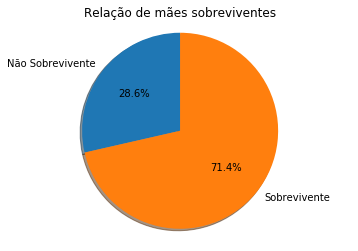

In [300]:
mothers = train_df[(train_df['Parch']>0) & (train_df['Titles']=='Mrs')]
labels = 'Não Sobrevivente', 'Sobrevivente'
plot_chart_pie(mothers, 'Survived',labels, 'Relação de mães sobreviventes')

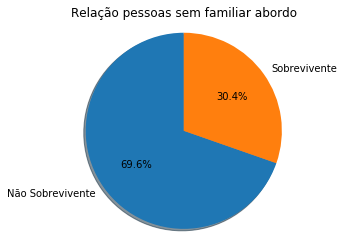

In [301]:
family = train_df[(train_df['Parch']==0) & (train_df['SibSp']==0)]
labels = 'Não Sobrevivente', 'Sobrevivente'
plot_chart_pie(family, 'Survived', labels, 'Relação pessoas sem familiar abordo')

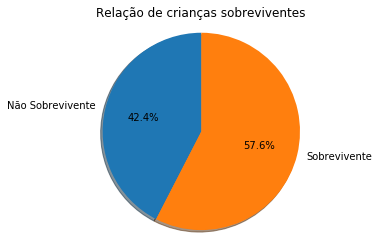

In [302]:
children = train_df[(train_df['Parch']>0) & (train_df['Age']<12)]
labels = 'Não Sobrevivente', 'Sobrevivente'
plot_chart_pie(children, 'Survived',labels, 'Relação de crianças sobreviventes')

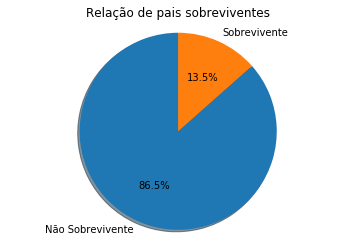

In [303]:
fathers = train_df[(train_df['Parch']>0) & (train_df['Titles']=='Mr')]
labels = 'Não Sobrevivente', 'Sobrevivente'
plot_chart_pie(fathers, 'Survived', labels, 'Relação de pais sobreviventes')

# Preprocessamento

In [304]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<b>Como mostrado durante a exploração dos dados na feature "Cabin", existe muitos valores faltantes, por isso será desconsiderada, outra features que apresenta dados faltantes é a de idades, porém é uma importante feature para determinar os sobreviventes, para ela será utilizada a técnica de inputação da dados, baseado na média dos valores</b>

In [305]:
def preprocessing(train_df):
    
    train_df = train_df.drop(columns=['Cabin'])
    mr = train_df[train_df['Titles']=="Mr"]
    master = train_df[train_df['Titles']=="Master"]
    miss = train_df[train_df['Titles']=="Miss"]
    mrs = train_df[train_df['Titles']=="Mrs"]
    dr = train_df[train_df['Titles']=="Dr"]
    

    
    mean_mr = int(mr['Age'].mean())
    mean_miss  = int(miss['Age'].mean())
    mean_mrs = int(mrs['Age'].mean())
    mean_master = int(master['Age'].mean())
    mean_dr = int(dr['Age'].mean())
      
    mr_null = train_df[(train_df['Age'].isnull()) & (train_df['Titles']=="Mr")]
    mrs_null = train_df[(train_df['Age'].isnull()) & (train_df['Titles']=="Mrs")]
    miss_null = train_df[(train_df['Age'].isnull()) & (train_df['Titles']=="Miss")]
    dr_null = train_df[(train_df['Age'].isnull()) & (train_df['Titles']=="Dr")]
    master_null = train_df[(train_df['Age'].isnull()) & (train_df['Titles']=="Master")]
    
    mr_null['Age'] = int(mean_mr)
    mrs_null['Age'] =  int(mean_mrs)
    miss_null['Age'] =  int(mean_miss)
    dr_null['Age'] =  int(mean_dr)
    master_null['Age'] = int(mean_master)

    train_df = train_df.combine_first(mr_null)
    train_df = train_df.combine_first(mrs_null)
    train_df = train_df.combine_first(miss_null)
    train_df = train_df.combine_first(dr_null) 
    train_df = train_df.combine_first(master_null)
     
    return train_df

train_df = preprocessing(train_df)

In [306]:
embarked = train_df[train_df['Embarked'].isnull()]
embarked.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs


{'S': 27, 'C': 29, 'Q': 1}


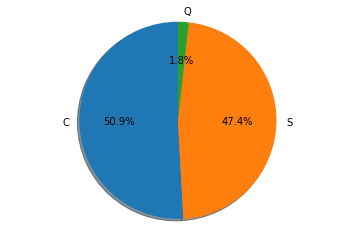

In [307]:
df = train_df[(train_df['Pclass']==1) & (train_df['Fare']>=80)]
df = df[df['Survived']==1]
df.head()
labels = 'C', 'S', 'Q'
dict_aux = dict(df['Embarked'].value_counts())
print(dict_aux)
sizes = [dict_aux['C'], dict_aux['S'], dict_aux['Q']]
_ , ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

<b>Os dois que tem a o local de embarque faltante, será atribuido a cidade de Cherbourg devido a das as caracteristicas dos passageiros C sera o porto com mais amostras.</b>

In [308]:
train_df['Embarked'] = train_df['Embarked'].replace(np.NaN,'C')

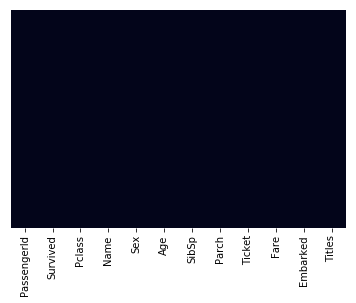

In [309]:
sns.heatmap(train_df.isnull(),cbar=False,yticklabels=False)

<b>Não há ocorrência de valores faltantes</b>

# Feature Engineer

<b> Após a exploração prévia do dataset agora será iniciado a engenharia de Features para compor o modelo de ML</b>

<b>A feature de Titulos já foi previamente integrada ao dataset pois auxiliou durante a análise exploratória, com os resultados dela, observamos que é interessante adiconarmos mais três features ao dataset, sendo elas mãe ,pai e filho, pois de acordo com a análise  dos dados dados foi observado a existência de relação que as mulheres que eram mães tiveram uma taxa de 71% de sobrevivência, enquanto que para os homens que eram pais tiveram um taxa de 80% de mortes, além disso crianças que tinham os país presentes no navio tiveram uma taxa de 57% de sobrevivência</b>

<b> Como visto no preprocessamento, reconhecer se uma pessoa é pai, mãe ou filho é importante para determinar se ela sobreviver ou não, então dada a situação será considerado mãe todas as mulheres que tem o titulo de "Mrs" que indica que a mulher é casada e que tem parch maior que 0, para determinar se é pai ou não será utilizado a mesma lógica para os homens que tem o título de "Mr", e criança acompanhada dos pais todos que tem menos de 12 anos que segundo o eca são considerados crianças(http://www.brasil.gov.br/cidadania-e-justica/2012/07/vinte-e-dois-anos-de-estatuto-da-crianca-e-do-adolescente).
    

<b>Será criada também a feature Travel_Alone que indica, se a pessoa tinha algum parente presente a bordo, pois de acordo com a Análise exploratória 70% das pessoas que viajaram sozinhas morreram no acidente.</b>

<b>Será utilizado também a técnica de One Hot encoding, para atribuir os valores binário para as variáveis que podem ter mais de 1 valor e não existe uma ordenação natural, como por exemplo a Feature PClass será mantida como está(Integer Encoding), pois ela trás a sensação de precedência entre as classes como por sendo a 1 para pessoas mais importas e 3 para as menos, as variáveis categáricas como a Título será, quebrada em cada um dos títulos em uma nova feature<b>

In [310]:

def mother(row):
    if row['Parch'] > 0 :
        if row['Titles'] == 'Mrs':
            return 1
        else:
            return 0
    else:
        return 0
    
def father(row):
    if row['Parch'] > 0 :
        if row['Titles'] == 'Mr':
            return 1
        else:
            return 0
    else:
        return 0
    

def children(row):
    if row['Parch'] > 0 :
        if row['Age'] < 12:
            return 1
        else:
            return 0
    else:
        return 0

def male(row):
    if row['Sex'] == 'male' :
        return 1
    else:
        return 0

def female(row):
    if row['Sex'] == 'female' :
        return 1
    else:
        return 0

def master(row):
    if row['Titles'] == 'Master' :
        return 1
    else:
        return 0

def miss(row):
    if row['Titles'] == 'Miss' :
        return 1
    else:
        return 0
    
def mr(row):
    if row['Titles'] == 'Mr' :
        return 1
    else:
        return 0


def mrs(row):
    if row['Titles'] == 'Mrs' :
        return 1
    else:
        return 0 

def c(row):
    if row['Embarked'] == 'C' :
        return 1
    else:
        return 0 

def s(row):
    if row['Embarked'] == 'S' :
        return 1
    else:
        return 0 
    
def q(row):
    if row['Embarked'] == 'Q' :
        return 1
    else:
        return 0 

def alone(row):
    if row['Parch'] == 0 :
        if row['SibSp'] ==  0:
            return 1
        else:
            return 0 
    else:
        return 0
    
def feature(train_df):
    train_df['Mother'] = train_df.apply(lambda z: mother(z), axis=1)
    train_df['Father'] = train_df.apply(lambda z: father(z), axis=1)
    train_df['Children'] = train_df.apply(lambda z: children(z), axis=1)
    train_df['Male'] = train_df.apply(lambda z: male(z), axis=1)
    train_df['Female'] = train_df.apply(lambda z: female(z), axis=1)
    train_df['Mrs'] = train_df.apply(lambda z: mrs(z), axis=1)
    train_df['Mr'] = train_df.apply(lambda z: mr(z), axis=1)
    train_df['Miss'] = train_df.apply(lambda z: miss(z), axis=1)
    train_df['Master'] = train_df.apply(lambda z: master(z), axis=1)
    train_df['C'] = train_df.apply(lambda z: c(z), axis=1)
    train_df['S'] = train_df.apply(lambda z: s(z), axis=1)
    train_df['Q'] = train_df.apply(lambda z: q(z), axis=1)
    train_df['Travel_Alone'] = train_df.apply(lambda z: alone(z), axis=1)
    return train_df

In [311]:
train_df = feature(train_df)
train_df = train_df.drop(columns=['Sex', 'Name', 'Ticket', 'Titles'])


In [312]:
train_df = train_df.drop(columns=['Embarked'])


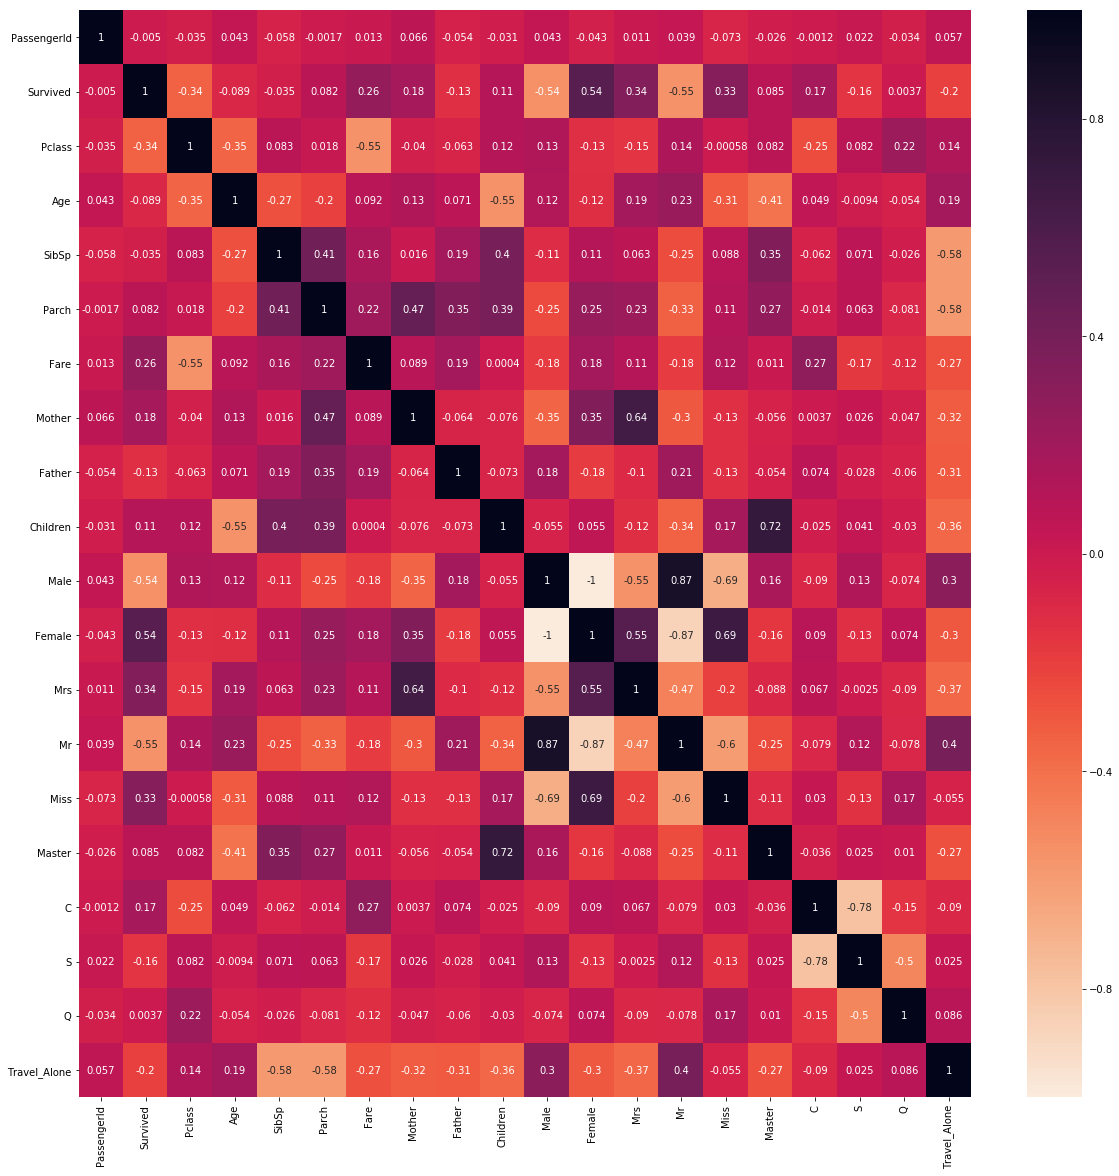

In [313]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(),annot=True,cmap=sns.cm.rocket_r)

<b>Features que apresentassem alta correlação positiva, seriam elimidas pois basicamente estáriam agregando a mesma informação ao modelo, Male e Mr tem uma correlação de 87%, então a feature Mr será eliminada</b>

# Modelos 

<b>As métricas para avaliação dos modelos serão, Acurácia e o Recall</b>


<b>A acurácia é a taxa de predições corretas feitas pelo modelo, para este problema em questão torna-se mais importante classificar corretamente se uma pessoa realmente sobrevivel e eventualmente, classificar um pessoa como não sobrevivênte e ela ter sobrevivido.</b>

<b>O Recall é cabacidade do modelo em classificar corretamente os Verdadeiros Positivos, sendo neste caso a capacidade do modelo em classificar corretamente as pessoas que sobreviveram</b>

In [314]:
X = train_df.drop(columns=['Survived','Mr'])
Y = train_df['Survived']

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, hamming_loss
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=42)
lf = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr').fit(X_train, Y_train)

lf_pred = lf.predict(X_test)

print("Acurárica = %.2f" % round(accuracy_score(Y_test, lf_pred)*100,2))
print("Recall = %.2f" % round(recall_score(Y_test, lf_pred)*100,2))


Acurárica = 82.46
Recall = 75.68


In [315]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
    
def curve_roc(Y_test, preds, title):
    fp, tp, thresholds = roc_curve(Y_test, preds)
    plt.plot(fp, tp, label='Curva de Roc')
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdadeiros Positivos')
    plt.title(title)
    plt.legend(loc="lower right")

In [316]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_pred = gnb.predict(X_test)

print("Acurácia = %.2f%%" % round(accuracy_score(Y_test, gnb_pred)*100,2))
print("Recall = %.2f%%" % round(recall_score(Y_test, gnb_pred)*100,2))


Acurácia = 79.10%
Recall = 75.68%


# AUC e Curva de ROC

<b>Aqui será avaliado o quão o modelo é capaz de distinguir entre as duas classes. AUCs próximos de 1.0 representam um boa capacidade.</b>

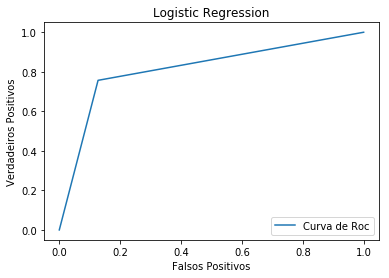

In [317]:
curve_roc(Y_test, lf_pred,"Logistic Regression")

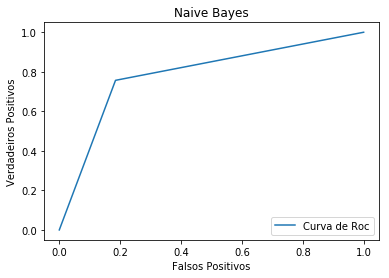

In [318]:
curve_roc(Y_test, gnb_pred, "Naive Bayes")

In [319]:
import numpy as np
from sklearn import metrics
print("AUC = Logistic Regression = %.2f" % round(metrics.roc_auc_score(Y_test, lf_pred),2))


AUC = Logistic Regression = 0.81


In [320]:
print("AUC Naive Bayes = %.2f" % round(metrics.roc_auc_score(Y_test, gnb_pred),2))

AUC Naive Bayes = 0.79


<b>Ambos os modelos apresentam uma boa capacidade em separação entre as classes da variável de interesse.</b>

# Cross Validation e Overffiting

<b>Uma preocupação que existe em ML é o Overffiting, que é o quanto o modelo fica inviesado pelo modelo, para testar se isso acontesse em ambos os modelos, será aplicado o Cross Validation afim de garantir a consistência.</b>

In [321]:
from sklearn.model_selection import cross_val_score

lf_cv = cross_val_score(lf, X, Y,
                            scoring='accuracy', cv=5)

print("Média do Cross Validation = %.2f" % round(lf_cv.mean()*100,2))

Média do Cross Validation = 82.50


In [322]:
from sklearn.model_selection import cross_val_score

gnb_cv = cross_val_score(gnb, X, Y,
                            scoring='accuracy', cv=5)

print("Média do Cross Validation = %.2f" % round(gnb_cv.mean()*100,2))


Média do Cross Validation = 80.02


<b>Com os resultados acima, nenhum dos modelos sofre de overffiting</b>